In [1]:
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
def gaussian_kernel(size, sigma):
    x = np.linspace(- (size // 2), size // 2, size)
    x /= np.sqrt(2)*sigma
    x2 = x**2
    kernel = np.exp(- x2[:, None] - x2[None, :])
    return kernel / kernel.sum()


In [3]:
size = 7
sigma = size / 6
gauss = gaussian_kernel(size,sigma)
gauss

array([[0.00015776, 0.0009901 , 0.00298049, 0.00430352, 0.00298049,
        0.0009901 , 0.00015776],
       [0.0009901 , 0.00621385, 0.01870557, 0.02700894, 0.01870557,
        0.00621385, 0.0009901 ],
       [0.00298049, 0.01870557, 0.05630943, 0.08130511, 0.05630943,
        0.01870557, 0.00298049],
       [0.00430352, 0.02700894, 0.08130511, 0.11739636, 0.08130511,
        0.02700894, 0.00430352],
       [0.00298049, 0.01870557, 0.05630943, 0.08130511, 0.05630943,
        0.01870557, 0.00298049],
       [0.0009901 , 0.00621385, 0.01870557, 0.02700894, 0.01870557,
        0.00621385, 0.0009901 ],
       [0.00015776, 0.0009901 , 0.00298049, 0.00430352, 0.00298049,
        0.0009901 , 0.00015776]])

In [4]:
dx = dy = size // 2
gaussMap = {}
p = np.linspace(- (size // 2), size // 2, size).astype(int)
for i in p:
    for j in p:
        gaussMap[(i,j)] = gauss[dx + i][dx + j]

In [5]:
from collections import defaultdict
def pointCalc(i,j,mat,gaussMap):
    p = np.linspace(- (size // 2), size // 2, size).astype(int)
    pixMap = defaultdict(int)
    for dx in p:
        if i + dx >= 0 and i + dx < len(mat):
            for dy in p:
                if j + dy >= 0 and j + dy < len(mat[0]):
                    pixMap[(dx,dy)] = mat[i+dx][j+dy]
    res = 0
    for dx in p:
        for dy in p:
            res += gaussMap[(dx,dy)] * pixMap[(dx,dy)]
    return res

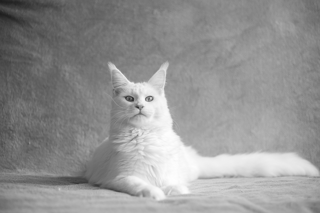

In [6]:
img = Image.open('images/cat.jpeg').convert('L').resize((640 // 2,426 // 2))
img

In [7]:
imgMat = np.array(img)
imgMat

array([[ 30,  30,  34, ..., 114, 113, 112],
       [ 30,  29,  31, ..., 118, 116, 112],
       [ 33,  33,  32, ..., 118, 117, 115],
       ...,
       [122, 122, 121, ..., 113, 115, 116],
       [125, 127, 128, ..., 111, 112, 113],
       [123, 125, 128, ..., 112, 112, 113]], dtype=uint8)

In [8]:
gausImg = imgMat.copy()
for i in range(len(imgMat)):
    for j in range(len(imgMat[0])):
        gausImg[i][j] = pointCalc(i,j,imgMat,gaussMap)
        # print(boxxed[i][j],imgMat[i][j])

In [9]:
final = Image.fromarray(gausImg)

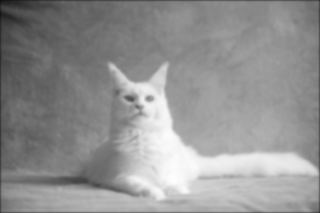

In [10]:
final

In [11]:
final.save('images/gauss.jpeg')